In [100]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
from PIL import Image
import pandas as pd

In [101]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gonzajl


Your Kaggle Key:

  ········


100%|██████████| 149M/149M [00:02<00:00, 67.4MB/s] 


In [102]:
od.download("https://www.kaggle.com/datasets/mohammadhossein77/brain-tumors-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gonzajl


Your Kaggle Key:

  ········


100%|██████████| 221M/221M [00:02<00:00, 88.7MB/s] 


In [103]:
def es_imagen(archivo):
    return archivo.endswith(('.jpg', '.jpeg', '.png'))

In [104]:
def refinar_imagenes(ruta_carpeta, tamaño_imagenes):
    for archivo in os.listdir(ruta_carpeta):
        if es_imagen(archivo):

            # Leemos la imagen
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            imagen = cv2.imread(ruta_imagen)
            
            # La pasamos a blanco y negro
            imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
            
            # Le cambiamos el tamaño
            imagen = cv2.resize(imagen, (tamaño_imagenes, tamaño_imagenes))
            imagen = imagen.reshape(tamaño_imagenes, tamaño_imagenes, 1)

            # Guardamos la imagen
            cv2.imwrite(ruta_imagen, imagen)

In [105]:
tamaño_imagenes = 224

refinar_imagenes("./brain-tumor-mri-dataset/Testing/glioma", tamaño_imagenes)
refinar_imagenes("./brain-tumor-mri-dataset/Testing/meningioma/", tamaño_imagenes)
refinar_imagenes("./brain-tumor-mri-dataset/Testing/notumor/", tamaño_imagenes)
refinar_imagenes("./brain-tumor-mri-dataset/Testing/pituitary/", tamaño_imagenes)

refinar_imagenes("./brain-tumor-mri-dataset/Training/glioma", tamaño_imagenes)
refinar_imagenes("./brain-tumor-mri-dataset/Training/meningioma/", tamaño_imagenes)
refinar_imagenes("./brain-tumor-mri-dataset/Training/notumor/", tamaño_imagenes)
refinar_imagenes("./brain-tumor-mri-dataset/Training/pituitary/", tamaño_imagenes)

refinar_imagenes("./brain-tumors-dataset/Data/Tumor/glioma_tumor", tamaño_imagenes)
refinar_imagenes("./brain-tumors-dataset/Data/Tumor/meningioma_tumor/", tamaño_imagenes)
refinar_imagenes("./brain-tumors-dataset/Data/Normal", tamaño_imagenes)
refinar_imagenes("./brain-tumors-dataset/Data/Tumor/pituitary_tumor/", tamaño_imagenes)

In [106]:
def aumentar_datos(carpeta_entrada, carpeta_salida, transformaciones):
    # Asegurarse de que la carpeta de salida exista
    if not os.path.exists(carpeta_salida):
        os.makedirs(carpeta_salida)

    for archivo in os.listdir(carpeta_entrada):
        if es_imagen(archivo):
            imagen = cv2.imread(os.path.join(carpeta_entrada, archivo))
            for transformacion in transformaciones:
                # Realizar la transformación en la imagen
                imagen_aumentada = transformacion(imagen)

                # Guardar la imagen aumentada en la carpeta de salida
                nombre_archivo = f"imagen_aumentada_{len(os.listdir(carpeta_salida)) + 1}.jpg"
                ruta_salida = os.path.join(carpeta_salida, nombre_archivo)
                cv2.imwrite(ruta_salida, imagen_aumentada)

In [107]:
carpeta_salida = "./tumores-cerebrales-mri-dataset"

transformaciones = [
    lambda img: cv2.flip(img, 1),  # Volteo horizontal
    lambda img: cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE),  # Rotación 90 grados
]

transformaciones2 = [
    lambda img: cv2.flip(img, 1),  # Volteo horizontal
    lambda img: cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE),  # Rotación 90 grados
    lambda img: cv2.medianBlur(img, 5),  # Desenfoque mediano
    #lambda img: cv2.blur(img, (5, 5)),  # Desenfoque gaussiano
    #lambda img: cv2.dilate(img, None, iterations=2),  # Dilatación
    #lambda img: cv2.erode(img, None, iterations=2),  # Erosión
]

aumentar_datos("./brain-tumor-mri-dataset/Testing/glioma", carpeta_salida + "/glioma/", transformaciones)
aumentar_datos("./brain-tumor-mri-dataset/Testing/meningioma/", carpeta_salida + "/meningioma/", transformaciones)
aumentar_datos("./brain-tumor-mri-dataset/Testing/notumor/", carpeta_salida + "/no-tumor/", transformaciones2)
aumentar_datos("./brain-tumor-mri-dataset/Testing/pituitary/", carpeta_salida + "/pituitary/", transformaciones)

aumentar_datos("./brain-tumor-mri-dataset/Training/glioma", carpeta_salida + "/glioma/", transformaciones)
aumentar_datos("./brain-tumor-mri-dataset/Training/meningioma/", carpeta_salida + "/meningioma/", transformaciones)
aumentar_datos("./brain-tumor-mri-dataset/Training/notumor/", carpeta_salida + "/no-tumor/", transformaciones2)
aumentar_datos("./brain-tumor-mri-dataset/Training/pituitary/", carpeta_salida + "/pituitary/", transformaciones)

In [108]:
!mv ./brain-tumor-mri-dataset/Testing/glioma/* ./tumores-cerebrales-mri-dataset/glioma
!mv ./brain-tumor-mri-dataset/Testing/meningioma/* ./tumores-cerebrales-mri-dataset/meningioma
!mv ./brain-tumor-mri-dataset/Testing/notumor/* ./tumores-cerebrales-mri-dataset/no-tumor
!mv ./brain-tumor-mri-dataset/Testing/pituitary/* ./tumores-cerebrales-mri-dataset/pituitary

!mv ./brain-tumor-mri-dataset/Training/glioma/* ./tumores-cerebrales-mri-dataset/glioma
!mv ./brain-tumor-mri-dataset/Training/meningioma/* ./tumores-cerebrales-mri-dataset/meningioma
!mv ./brain-tumor-mri-dataset/Training/notumor/* ./tumores-cerebrales-mri-dataset/no-tumor
!mv ./brain-tumor-mri-dataset/Training/pituitary/* ./tumores-cerebrales-mri-dataset/pituitary

!mv ./brain-tumors-dataset/Data/Normal/* ./tumores-cerebrales-mri-dataset/no-tumor
!mv ./brain-tumors-dataset/Data/Tumor/glioma_tumor/* ./tumores-cerebrales-mri-dataset/glioma
!mv ./brain-tumors-dataset/Data/Tumor/meningioma_tumor/* ./tumores-cerebrales-mri-dataset/meningioma
!mv ./brain-tumors-dataset/Data/Tumor/pituitary_tumor/* ./tumores-cerebrales-mri-dataset/pituitary

In [109]:
def agregar_filas(filas, ruta_carpeta, etiquetas):
    for archivo in os.listdir(ruta_carpeta):
        if es_imagen(archivo):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            fila = {
            "imagen": ruta_imagen,
            "glioma": etiquetas[0],
            "meningioma": etiquetas[1],
            "pituitary": etiquetas[2],
            "no_tumor": etiquetas[3]
            }
            filas.append(fila)

In [110]:
filas = []
agregar_filas(filas, "./tumores-cerebrales-mri-dataset/glioma", [1, 0, 0, 0])
agregar_filas(filas, "./tumores-cerebrales-mri-dataset/meningioma", [0, 1, 0, 0])
agregar_filas(filas, "./tumores-cerebrales-mri-dataset/pituitary", [0, 0, 1, 0])
agregar_filas(filas, "./tumores-cerebrales-mri-dataset/no-tumor", [0, 0, 0, 1])

columnas = ["imagen", "glioma", "meningioma", "pituitary", "no_tumor"]

# Crea el DataFrame con las filas y nombres de columnas
df = pd.DataFrame(filas, columns=columnas)

# Exporta el DataFrame en un archivo CSV
df.to_csv("datos.csv", index=False)

In [111]:
def mostrar_grafico_clases(datos):
    cant_glioma = (datos["glioma"] == 1).sum()
    cant_meningioma = (datos["meningioma"] == 1).sum()
    cant_pituitary = (datos["pituitary"] == 1).sum()
    cant_no_tumor = (datos["no_tumor"] == 1).sum()

    categorias = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
    cantidades = [cant_glioma, cant_meningioma, cant_pituitary, cant_no_tumor]

    plt.figure(figsize=(6, 4))
    barras = plt.bar(categorias, cantidades)

    for bar, cantidad in zip(barras, cantidades):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() / 2 - 550, str(cantidad), fontsize=12)

    plt.xlabel('Clases')
    plt.ylabel('Cantidad de Imágenes')
    plt.title('Cantidad de Imágenes por Clase')

    plt.show()

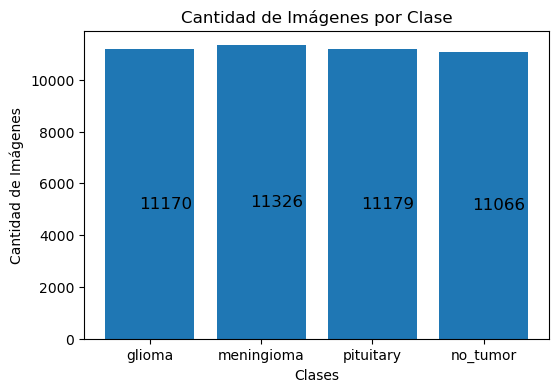

In [112]:
datos = pd.read_csv("./datos.csv")
mostrar_grafico_clases(datos)

In [113]:
cant_imagenes = 11000

# Filtra los datos para las clases glioma, meningioma y pituitary
df_0 = datos[datos.glioma == 1][:cant_imagenes]
df_1 = datos[datos.meningioma == 1][:cant_imagenes]
df_2 = datos[datos.pituitary == 1][:cant_imagenes]
df_3 = datos[datos.no_tumor == 1][:cant_imagenes]

# Concatena los DataFrames filtrados
datos_nivelados = pd.concat([df_0, df_1, df_2, df_3])

# Ordena los datos por el ID de la imagen
datos_nivelados = datos_nivelados.sort_values(by="imagen", ascending=True)

# Restablece los índices
datos_nivelados.reset_index(drop=True, inplace=True)

# Verifica que las clases ahora tengan la misma cantidad de imágenes
conteo_clases = datos_nivelados.groupby(["glioma", "meningioma", "pituitary", "no_tumor"]).size()
print(conteo_clases)

glioma  meningioma  pituitary  no_tumor
0       0           0          1           11000
                    1          0           11000
        1           0          0           11000
1       0           0          0           11000
dtype: int64


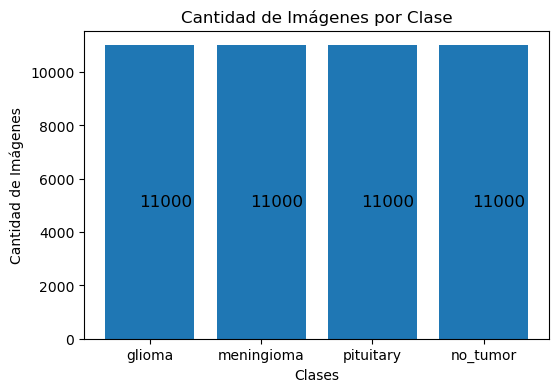

In [114]:
mostrar_grafico_clases(datos_nivelados)

In [115]:
datos_nivelados.to_csv("datos.csv", index=False)